In [ ]:
!wget www.di.ens.fr/~lelarge/MNIST.tar.gz
!tar -zxvf MNIST.tar.gz

--2025-10-09 08:34:14--  http://www.di.ens.fr/~lelarge/MNIST.tar.gz
Resolving www.di.ens.fr (www.di.ens.fr)... 129.199.99.14
Connecting to www.di.ens.fr (www.di.ens.fr)|129.199.99.14|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.di.ens.fr/~lelarge/MNIST.tar.gz [following]
--2025-10-09 08:34:14--  https://www.di.ens.fr/~lelarge/MNIST.tar.gz
Connecting to www.di.ens.fr (www.di.ens.fr)|129.199.99.14|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/x-gzip]
Saving to: ‘MNIST.tar.gz.4’

MNIST.tar.gz.4          [    <=>             ]  33.20M  47.4MB/s    in 0.7s    

2025-10-09 08:34:15 (47.4 MB/s) - ‘MNIST.tar.gz.4’ saved [34813078]

MNIST/
MNIST/raw/
MNIST/raw/train-labels-idx1-ubyte
MNIST/raw/t10k-labels-idx1-ubyte.gz
MNIST/raw/t10k-labels-idx1-ubyte
MNIST/raw/t10k-images-idx3-ubyte.gz
MNIST/raw/train-images-idx3-ubyte
MNIST/raw/train-labels-idx1-ubyte.gz
MNIST/raw/t10k-images-idx3-ubyte
MNIST/raw

In [128]:
import torch
from torchvision import datasets, transforms
import torch.nn as nn
from tqdm import tqdm
import matplotlib.pyplot as plt
%matplotlib inline
import math

In [ ]:
transform = transforms.Compose([
   transforms.ToTensor(),
   transforms.Normalize((0.1307,), (0.3081,))
])

train_dataset = datasets.MNIST('.', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST('.', train=False, transform=transform)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=32, shuffle=True)

In [ ]:
class Optimizer:
    def __init__(self, params):
        self.params = list(params)

    def zero_grad(self):
        for param in self.params:
            if param.grad is not None:
                param.grad.detach_()
                param.grad.zero_()

    def pre_step(self):
        pass

    def step(self):
        pass

    def update_param(self, p):
        raise NotImplementedError()

Будем использовать модель свёрточной нейронной сети из ДЗ №3:

In [109]:
n_epochs = 10
losses = []
accuracies = []

def train(model, optimizer, n_epochs=n_epochs):
    for epoch in range(n_epochs):

        for x_train, y_train in tqdm(train_loader):
            y_pred = model(x_train)
            log_probs = log_softmax(y_pred, dim=1)
            loss = NLLLoss()(log_probs, y_train)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
            if sheduler:
              sheduler.step()

        test_loss = []
        test_accuracy = []
        with torch.no_grad():
            for x_test, y_test in tqdm(test_loader):
                y_pred = model(x_test)
                loss = NLLLoss()(log_softmax(y_pred), y_test)
                test_loss.append(loss.numpy())
                test_accuracy.extend((torch.argmax(y_pred, dim=-1) == y_test).numpy().tolist())

        print(f'Epoch: {epoch}, loss: {np.mean(test_loss)}, accuracy: {np.mean(test_accuracy)}')
        losses.append(np.mean(test_loss))
        accuracies.append(np.mean(test_accuracy))

In [ ]:
model = nn.Sequential(
    nn.Conv2d(in_channels=1, out_channels=10, kernel_size=5),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=4),
    nn.Flatten(),
    nn.Linear(6*6*10, 128),
    nn.ReLU(),
    nn.Linear(128, 10)
)

optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

In [ ]:
train(model, optimizer, n_epochs=10)

  0%|          | 0/313 [00:00<?, ?it/s]/tmp/ipython-input-356385860.py:21: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  loss = NLLLoss()(log_softmax(y_pred), y_test)
100%|██████████| 313/313 [00:02<00:00, 115.39it/s]


Epoch: 0, loss: 0.6422768235206604, accuracy: 0.8437


100%|██████████| 313/313 [00:02<00:00, 108.11it/s]


Epoch: 1, loss: 0.3903248608112335, accuracy: 0.8948


100%|██████████| 313/313 [00:02<00:00, 111.68it/s]


Epoch: 2, loss: 0.30914217233657837, accuracy: 0.9159


100%|██████████| 313/313 [00:02<00:00, 110.07it/s]


Epoch: 3, loss: 0.26465532183647156, accuracy: 0.9254


100%|██████████| 313/313 [00:03<00:00, 88.67it/s] 


Epoch: 4, loss: 0.22967460751533508, accuracy: 0.9356


100%|██████████| 313/313 [00:03<00:00, 88.90it/s]


Epoch: 5, loss: 0.20248988270759583, accuracy: 0.9414


100%|██████████| 313/313 [00:03<00:00, 97.26it/s]


Epoch: 6, loss: 0.1818680763244629, accuracy: 0.9488


100%|██████████| 313/313 [00:04<00:00, 76.47it/s]


Epoch: 7, loss: 0.16611027717590332, accuracy: 0.9543


100%|██████████| 313/313 [00:04<00:00, 74.17it/s]


Epoch: 8, loss: 0.1518934667110443, accuracy: 0.9579


100%|██████████| 313/313 [00:03<00:00, 97.98it/s]

Epoch: 9, loss: 0.14172035455703735, accuracy: 0.9598


In [ ]:
len(losses), len(accuracies)

(10, 10)

In [ ]:
def make_plot(title):
  plt.figure(figsize=(12, 5))
  plt.title(title)
  plt.subplot(1, 2, 1)
  plt.plot(losses, label='Loss')
  plt.xlabel('Epochs', fontsize=16)
  plt.ylabel('Loss', fontsize=16)
  plt.grid('on')
  plt.subplot(1, 2, 2)
  plt.plot(accuracies, label='Accuracy')
  plt.xlabel('Epochs', fontsize=16)
  plt.ylabel('Accuracy', fontsize=16)
  plt.grid('on')
  plt.show()

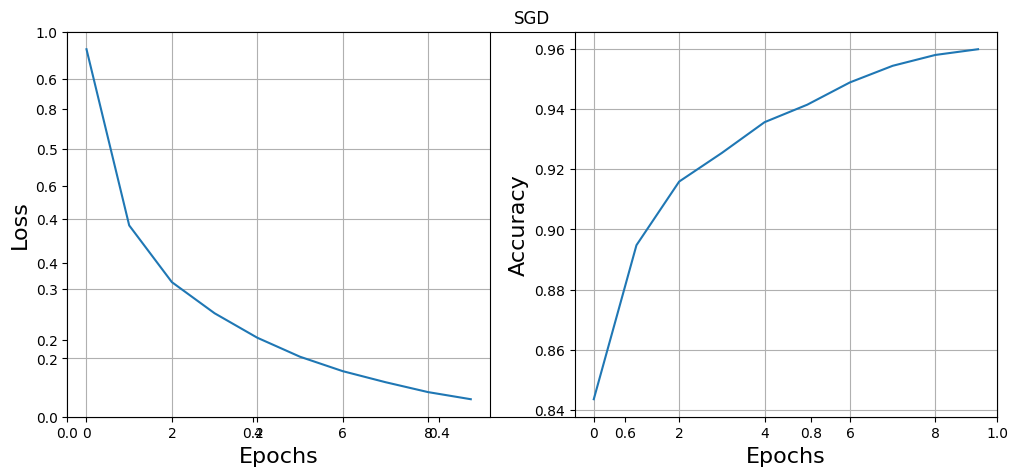

In [ ]:
make_plot('SGD')

Реализуем Adam, AdamW:

In [ ]:
class Adam(Optimizer):
    def __init__(self, params, lr=1e-3, betas=(0.9, 0.999), eps=1e-8):
        super().__init__(params)
        self.lr = lr
        self.beta1, self.beta2 = betas
        self.eps = eps

        self.m = [torch.zeros_like(p) for p in self.params]
        self.v = [torch.zeros_like(p) for p in self.params]
        self.t = 0

    def step(self):
        self.t += 1
        with torch.no_grad():
            for i, p in enumerate(self.params):
                if p.grad is None:
                    continue

                grad = p.grad

                self.m[i] = self.beta1 * self.m[i] + (1 - self.beta1) * grad
                self.v[i] = self.beta2 * self.v[i] + (1 - self.beta2) * (grad ** 2)

                m_hat = self.m[i] / (1 - self.beta1 ** self.t)
                v_hat = self.v[i] / (1 - self.beta2 ** self.t)

                p -= self.lr * m_hat / (torch.sqrt(v_hat) + self.eps)


class AdamW(Optimizer):
    def __init__(self, params, lr=1e-3, betas=(0.9, 0.999), eps=1e-8, weight_decay=1e-2):
        super().__init__(params)
        self.lr = lr
        self.beta1, self.beta2 = betas
        self.eps = eps
        self.weight_decay = weight_decay

        self.m = [torch.zeros_like(p) for p in self.params]
        self.v = [torch.zeros_like(p) for p in self.params]
        self.t = 0

    def step(self):
        self.t += 1
        with torch.no_grad():
            for i, p in enumerate(self.params):
                if p.grad is None:
                    continue

                grad = p.grad

                self.m[i] = self.beta1 * self.m[i] + (1 - self.beta1) * grad
                self.v[i] = self.beta2 * self.v[i] + (1 - self.beta2) * (grad ** 2)

                m_hat = self.m[i] / (1 - self.beta1 ** self.t)
                v_hat = self.v[i] / (1 - self.beta2 ** self.t)

                p -= self.lr * self.weight_decay * p

                p -= self.lr * m_hat / (torch.sqrt(v_hat) + self.eps)

Обучим модели с новыми оптимизаторами:

In [ ]:
model = nn.Sequential(
    nn.Conv2d(in_channels=1, out_channels=10, kernel_size=5),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=4),
    nn.Flatten(),
    nn.Linear(6*6*10, 128),
    nn.ReLU(),
    nn.Linear(128, 10)
)

optimizer = Adam(model.parameters(), lr=0.001)

train(model, optimizer, n_epochs=10)

  0%|          | 0/313 [00:00<?, ?it/s]/tmp/ipython-input-356385860.py:21: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  loss = NLLLoss()(log_softmax(y_pred), y_test)
100%|██████████| 313/313 [00:02<00:00, 107.05it/s]


Epoch: 0, loss: 0.07739055156707764, accuracy: 0.9753


100%|██████████| 313/313 [00:03<00:00, 92.46it/s]


Epoch: 1, loss: 0.05028006061911583, accuracy: 0.9834


100%|██████████| 313/313 [00:03<00:00, 86.17it/s] 


Epoch: 2, loss: 0.047120481729507446, accuracy: 0.9843


100%|██████████| 313/313 [00:02<00:00, 104.56it/s]


Epoch: 3, loss: 0.039349425584077835, accuracy: 0.9878


100%|██████████| 313/313 [00:02<00:00, 109.58it/s]


Epoch: 4, loss: 0.03516026586294174, accuracy: 0.9878


100%|██████████| 313/313 [00:02<00:00, 111.26it/s]


Epoch: 5, loss: 0.036013100296258926, accuracy: 0.9885


100%|██████████| 313/313 [00:02<00:00, 109.57it/s]


Epoch: 6, loss: 0.04668624326586723, accuracy: 0.9856


100%|██████████| 313/313 [00:02<00:00, 106.29it/s]


Epoch: 7, loss: 0.04168463870882988, accuracy: 0.9866


100%|██████████| 313/313 [00:03<00:00, 84.81it/s]


Epoch: 8, loss: 0.0430682897567749, accuracy: 0.9862


100%|██████████| 313/313 [00:03<00:00, 91.34it/s] 

Epoch: 9, loss: 0.03731532767415047, accuracy: 0.9891


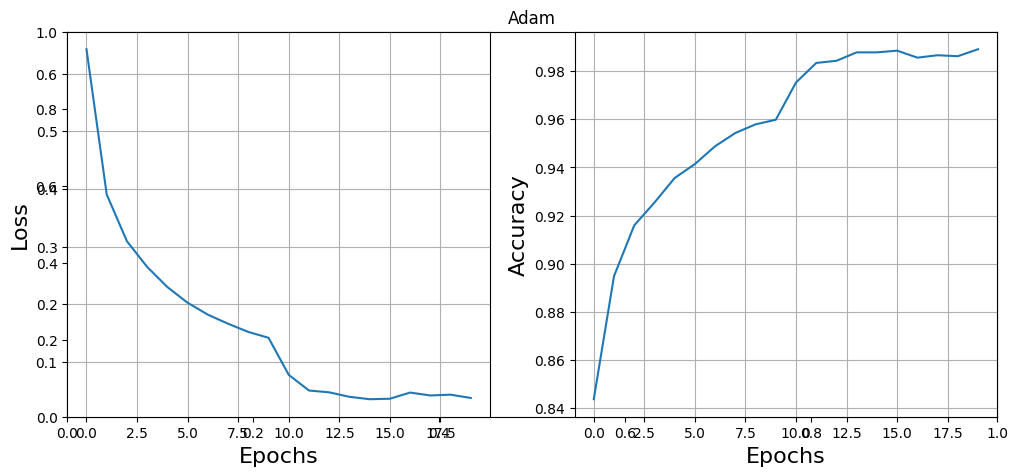

In [ ]:
make_plot('Adam')

In [ ]:
model = nn.Sequential(
    nn.Conv2d(in_channels=1, out_channels=10, kernel_size=5),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=4),
    nn.Flatten(),
    nn.Linear(6*6*10, 128),
    nn.ReLU(),
    nn.Linear(128, 10)
)

optimizer = AdamW(model.parameters(), lr=0.001)

train(model, optimizer, n_epochs=10)

  0%|          | 0/313 [00:00<?, ?it/s]/tmp/ipython-input-356385860.py:21: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  loss = NLLLoss()(log_softmax(y_pred), y_test)
100%|██████████| 313/313 [00:02<00:00, 112.22it/s]


Epoch: 0, loss: 0.07823380082845688, accuracy: 0.9743


100%|██████████| 313/313 [00:03<00:00, 86.63it/s]


Epoch: 1, loss: 0.0686018094420433, accuracy: 0.9786


100%|██████████| 313/313 [00:03<00:00, 92.93it/s]


Epoch: 2, loss: 0.05161650478839874, accuracy: 0.9821


100%|██████████| 313/313 [00:03<00:00, 86.86it/s] 


Epoch: 3, loss: 0.0385473407804966, accuracy: 0.9862


100%|██████████| 313/313 [00:02<00:00, 106.69it/s]


Epoch: 4, loss: 0.04585863649845123, accuracy: 0.9845


100%|██████████| 313/313 [00:02<00:00, 112.79it/s]


Epoch: 5, loss: 0.03231620788574219, accuracy: 0.9899


100%|██████████| 313/313 [00:02<00:00, 110.06it/s]


Epoch: 6, loss: 0.03818599134683609, accuracy: 0.9878


100%|██████████| 313/313 [00:02<00:00, 112.28it/s]


Epoch: 7, loss: 0.033942367881536484, accuracy: 0.9891


100%|██████████| 313/313 [00:03<00:00, 99.49it/s]


Epoch: 8, loss: 0.03896310180425644, accuracy: 0.9879


100%|██████████| 313/313 [00:03<00:00, 86.08it/s]

Epoch: 9, loss: 0.03257737308740616, accuracy: 0.9898


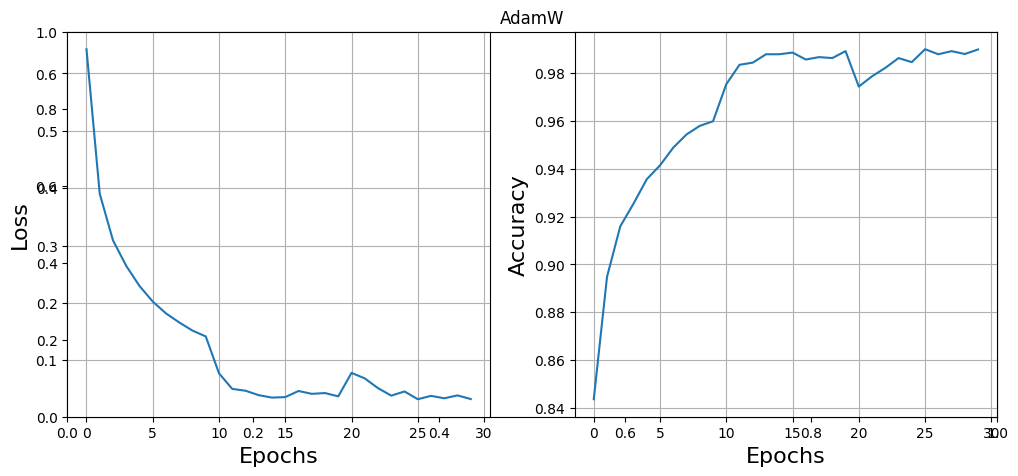

In [ ]:
make_plot('AdamW')

Реализуем LinearLR и CosineAnnealingLR:

In [141]:
class LRScheduler:
    def __init__(self, optimizer: Optimizer):
        self.optimizer = optimizer
        self.epoch = 0

    def step(self):
        self.epoch += 1

    def update_optimizer_lr(self, lr):
      if type(self.optimizer) == torch.optim.SGD:
        for param_group in self.optimizer.param_groups:
          param_group['lr'] = lr
      else:
        self.optimizer.lr = lr



class LinearLR(LRScheduler):
    def __init__(self, optimizer, start_factor = 0.1, end_factor = 1.0, total_iters = 100):
        super().__init__(optimizer)
        self.start_factor = start_factor
        self.end_factor = end_factor
        self.total_iters = total_iters

        if type(optimizer) == torch.optim.SGD:
          self.base_lr = optimizer.param_groups[0]['lr']
        else:
          self.base_lr = optimizer.lr
        self.current_lr = self.base_lr * start_factor
        self.update_optimizer_lr(self.current_lr)

    def step(self):
        super().step()

        if self.epoch <= self.total_iters:
            factor = self.start_factor + (self.end_factor - self.start_factor) * (self.epoch / self.total_iters)
            self.current_lr = self.base_lr * factor
            self.update_optimizer_lr(self.current_lr)


class CosineAnnealing(LRScheduler):
    def __init__(self, optimizer, T_max = 20, eta_min = 0.01):
        super().__init__(optimizer)
        self.T_max = T_max
        self.eta_min = eta_min

        if type(optimizer) == torch.optim.SGD:
          self.eta_max= optimizer.param_groups[0]['lr']
        else:
          self.eta_max = optimizer.lr
        self.current_lr = self.eta_max
        self.update_optimizer_lr(self.current_lr)

    def step(self):
        super().step()

        progress = (self.epoch - 1) % self.T_max
        self.current_lr = self.eta_min + 0.5 * (self.eta_max - self.eta_min) * (1 + math.cos(math.pi * progress / self.T_max))
        self.update_optimizer_lr(self.current_lr)

Обучим SGD + LinearLR

In [119]:
model = nn.Sequential(
    nn.Conv2d(in_channels=1, out_channels=10, kernel_size=5),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=4),
    nn.Flatten(),
    nn.Linear(6*6*10, 128),
    nn.ReLU(),
    nn.Linear(128, 10)
)

optimizer = torch.optim.SGD(model.parameters(), lr=0.001)
sheduler = LinearLR(optimizer, start_factor=0.1, total_iters=100)

train(model, optimizer, n_epochs=10)

  0%|          | 0/313 [00:00<?, ?it/s]/tmp/ipython-input-3084390804.py:23: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  loss = NLLLoss()(log_softmax(y_pred), y_test)
100%|██████████| 313/313 [00:03<00:00, 101.56it/s]


Epoch: 0, loss: 0.7896097898483276, accuracy: 0.8248


100%|██████████| 313/313 [00:03<00:00, 89.00it/s]


Epoch: 1, loss: 0.39122065901756287, accuracy: 0.8956


100%|██████████| 313/313 [00:02<00:00, 109.39it/s]


Epoch: 2, loss: 0.28852578997612, accuracy: 0.9232


100%|██████████| 313/313 [00:03<00:00, 93.80it/s]


Epoch: 3, loss: 0.24076448380947113, accuracy: 0.9351


100%|██████████| 313/313 [00:02<00:00, 107.55it/s]


Epoch: 4, loss: 0.20932906866073608, accuracy: 0.9422


100%|██████████| 313/313 [00:04<00:00, 74.08it/s]


Epoch: 5, loss: 0.1854190081357956, accuracy: 0.9484


100%|██████████| 313/313 [00:03<00:00, 82.84it/s]


Epoch: 6, loss: 0.16617989540100098, accuracy: 0.9516


100%|██████████| 313/313 [00:03<00:00, 80.74it/s]


Epoch: 7, loss: 0.15698406100273132, accuracy: 0.9543


100%|██████████| 313/313 [00:03<00:00, 79.84it/s]


Epoch: 8, loss: 0.14165373146533966, accuracy: 0.959


100%|██████████| 313/313 [00:03<00:00, 102.61it/s]

Epoch: 9, loss: 0.13265204429626465, accuracy: 0.9615


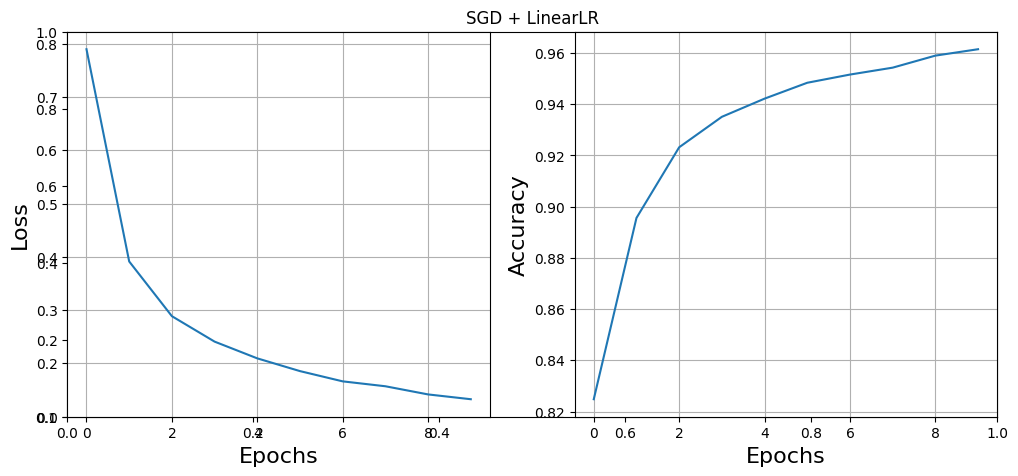

In [120]:
make_plot('SGD + LinearLR')

Обучим SGD + CosineAnnealing:

In [129]:
model = nn.Sequential(
    nn.Conv2d(in_channels=1, out_channels=10, kernel_size=5),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=4),
    nn.Flatten(),
    nn.Linear(6*6*10, 128),
    nn.ReLU(),
    nn.Linear(128, 10)
)

optimizer = torch.optim.SGD(model.parameters(), lr=0.001)
sheduler = CosineAnnealing(optimizer, eta_min=0.001)

train(model, optimizer, n_epochs=10)

  0%|          | 0/313 [00:00<?, ?it/s]/tmp/ipython-input-3084390804.py:23: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  loss = NLLLoss()(log_softmax(y_pred), y_test)
100%|██████████| 313/313 [00:03<00:00, 83.42it/s]


Epoch: 0, loss: 0.7783727645874023, accuracy: 0.8211


100%|██████████| 313/313 [00:03<00:00, 92.46it/s] 


Epoch: 1, loss: 0.39610055088996887, accuracy: 0.8966


100%|██████████| 313/313 [00:03<00:00, 84.66it/s] 


Epoch: 2, loss: 0.298766553401947, accuracy: 0.9162


100%|██████████| 313/313 [00:03<00:00, 87.39it/s]


Epoch: 3, loss: 0.25140058994293213, accuracy: 0.9284


100%|██████████| 313/313 [00:03<00:00, 92.33it/s]


Epoch: 4, loss: 0.21886597573757172, accuracy: 0.9373


100%|██████████| 313/313 [00:05<00:00, 62.05it/s]


Epoch: 5, loss: 0.1933886706829071, accuracy: 0.9431


100%|██████████| 313/313 [00:03<00:00, 82.54it/s] 


Epoch: 6, loss: 0.1730414479970932, accuracy: 0.9504


100%|██████████| 313/313 [00:03<00:00, 98.87it/s]


Epoch: 7, loss: 0.1573772430419922, accuracy: 0.9532


100%|██████████| 313/313 [00:02<00:00, 109.07it/s]


Epoch: 8, loss: 0.14582249522209167, accuracy: 0.9585


100%|██████████| 313/313 [00:03<00:00, 85.06it/s] 

Epoch: 9, loss: 0.13359138369560242, accuracy: 0.9624


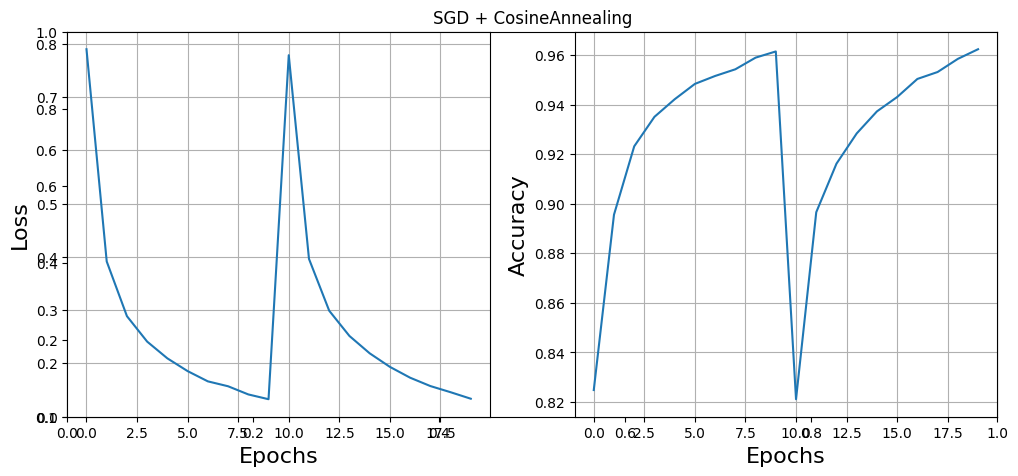

In [135]:
make_plot('SGD + CosineAnnealing')

Обучим Adam + LinearLR:

In [142]:
model = nn.Sequential(
    nn.Conv2d(in_channels=1, out_channels=10, kernel_size=5),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=4),
    nn.Flatten(),
    nn.Linear(6*6*10, 128),
    nn.ReLU(),
    nn.Linear(128, 10)
)

optimizer = Adam(model.parameters(), lr=0.001)
sheduler = LinearLR(optimizer, start_factor=0.1, total_iters=100)

train(model, optimizer, n_epochs=10)

  0%|          | 0/313 [00:00<?, ?it/s]/tmp/ipython-input-3084390804.py:23: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  loss = NLLLoss()(log_softmax(y_pred), y_test)
100%|██████████| 313/313 [00:02<00:00, 110.06it/s]


Epoch: 0, loss: 0.05330802872776985, accuracy: 0.9827


100%|██████████| 313/313 [00:03<00:00, 100.26it/s]


Epoch: 1, loss: 0.04836020991206169, accuracy: 0.9838


100%|██████████| 313/313 [00:03<00:00, 87.22it/s]


Epoch: 2, loss: 0.03671678900718689, accuracy: 0.9882


100%|██████████| 313/313 [00:02<00:00, 111.82it/s]


Epoch: 3, loss: 0.04186393320560455, accuracy: 0.9856


100%|██████████| 313/313 [00:02<00:00, 111.76it/s]


Epoch: 4, loss: 0.034595757722854614, accuracy: 0.9887


100%|██████████| 313/313 [00:02<00:00, 109.68it/s]


Epoch: 5, loss: 0.033784884959459305, accuracy: 0.9899


100%|██████████| 313/313 [00:02<00:00, 108.88it/s]


Epoch: 6, loss: 0.03861125931143761, accuracy: 0.987


100%|██████████| 313/313 [00:02<00:00, 108.74it/s]


Epoch: 7, loss: 0.03870415687561035, accuracy: 0.989


100%|██████████| 313/313 [00:02<00:00, 110.95it/s]


Epoch: 8, loss: 0.037574831396341324, accuracy: 0.9886


100%|██████████| 313/313 [00:03<00:00, 102.69it/s]

Epoch: 9, loss: 0.03313974291086197, accuracy: 0.9896


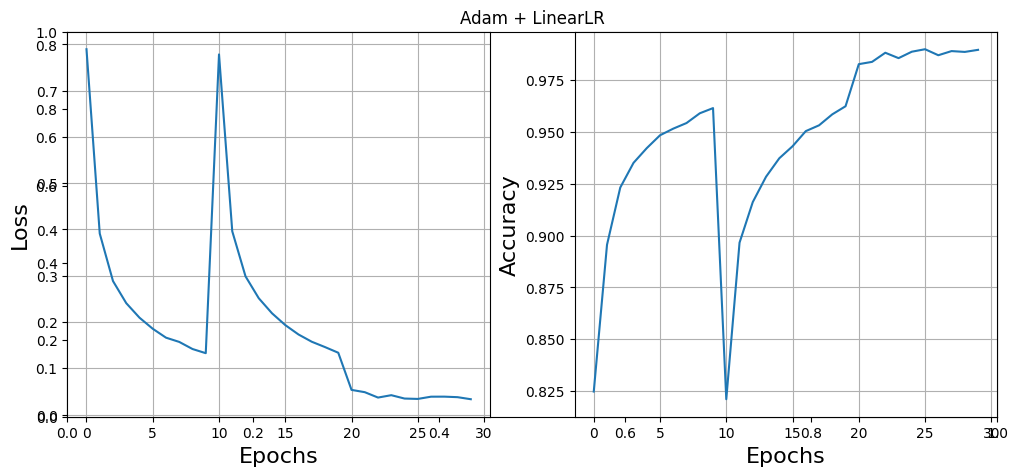

In [143]:
make_plot('Adam + LinearLR')

Обучим Adam + CosineAnnealing:

In [144]:
model = nn.Sequential(
    nn.Conv2d(in_channels=1, out_channels=10, kernel_size=5),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=4),
    nn.Flatten(),
    nn.Linear(6*6*10, 128),
    nn.ReLU(),
    nn.Linear(128, 10)
)

optimizer = Adam(model.parameters(), lr=0.001)
sheduler = CosineAnnealing(optimizer, eta_min=0.001)

train(model, optimizer, n_epochs=10)

  0%|          | 0/313 [00:00<?, ?it/s]/tmp/ipython-input-3084390804.py:23: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  loss = NLLLoss()(log_softmax(y_pred), y_test)
100%|██████████| 313/313 [00:02<00:00, 110.69it/s]


Epoch: 0, loss: 0.07079745084047318, accuracy: 0.9771


100%|██████████| 313/313 [00:02<00:00, 109.13it/s]


Epoch: 1, loss: 0.051695216447114944, accuracy: 0.9841


100%|██████████| 313/313 [00:02<00:00, 107.81it/s]


Epoch: 2, loss: 0.052915897220373154, accuracy: 0.9819


100%|██████████| 313/313 [00:03<00:00, 102.80it/s]


Epoch: 3, loss: 0.03992695361375809, accuracy: 0.9867


100%|██████████| 313/313 [00:03<00:00, 90.29it/s] 


Epoch: 4, loss: 0.03972001001238823, accuracy: 0.9878


100%|██████████| 313/313 [00:02<00:00, 108.48it/s]


Epoch: 5, loss: 0.035168565809726715, accuracy: 0.9889


100%|██████████| 313/313 [00:02<00:00, 111.91it/s]


Epoch: 6, loss: 0.03627881780266762, accuracy: 0.9887


100%|██████████| 313/313 [00:02<00:00, 109.83it/s]


Epoch: 7, loss: 0.04134485125541687, accuracy: 0.9877


100%|██████████| 313/313 [00:02<00:00, 110.14it/s]


Epoch: 8, loss: 0.036594197154045105, accuracy: 0.989


100%|██████████| 313/313 [00:02<00:00, 111.11it/s]

Epoch: 9, loss: 0.037491705268621445, accuracy: 0.9892


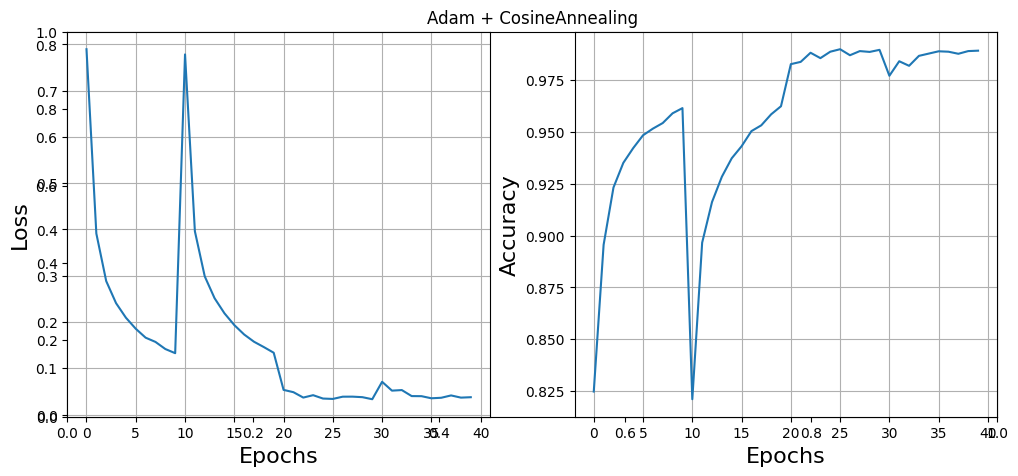

In [145]:
make_plot('Adam + CosineAnnealing')

Обучим AdamW + LinearLR:

In [146]:
model = nn.Sequential(
    nn.Conv2d(in_channels=1, out_channels=10, kernel_size=5),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=4),
    nn.Flatten(),
    nn.Linear(6*6*10, 128),
    nn.ReLU(),
    nn.Linear(128, 10)
)

optimizer = AdamW(model.parameters(), lr=0.001)
sheduler = LinearLR(optimizer, start_factor=0.1, total_iters=100)

train(model, optimizer, n_epochs=10)

  0%|          | 0/313 [00:00<?, ?it/s]/tmp/ipython-input-3084390804.py:23: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  loss = NLLLoss()(log_softmax(y_pred), y_test)
100%|██████████| 313/313 [00:02<00:00, 104.64it/s]


Epoch: 0, loss: 0.06444910168647766, accuracy: 0.9793


100%|██████████| 313/313 [00:03<00:00, 93.93it/s]


Epoch: 1, loss: 0.05429060757160187, accuracy: 0.9815


100%|██████████| 313/313 [00:03<00:00, 81.47it/s]


Epoch: 2, loss: 0.038195960223674774, accuracy: 0.9879


100%|██████████| 313/313 [00:02<00:00, 108.15it/s]


Epoch: 3, loss: 0.04446123167872429, accuracy: 0.9854


100%|██████████| 313/313 [00:02<00:00, 109.04it/s]


Epoch: 4, loss: 0.03484775871038437, accuracy: 0.9892


100%|██████████| 313/313 [00:02<00:00, 108.09it/s]


Epoch: 5, loss: 0.035343773663043976, accuracy: 0.9889


100%|██████████| 313/313 [00:02<00:00, 110.63it/s]


Epoch: 6, loss: 0.03973015770316124, accuracy: 0.988


100%|██████████| 313/313 [00:02<00:00, 110.08it/s]


Epoch: 7, loss: 0.03476914390921593, accuracy: 0.9889


100%|██████████| 313/313 [00:03<00:00, 99.40it/s]


Epoch: 8, loss: 0.038232434540987015, accuracy: 0.9884


100%|██████████| 313/313 [00:03<00:00, 86.66it/s] 

Epoch: 9, loss: 0.03459624946117401, accuracy: 0.9899


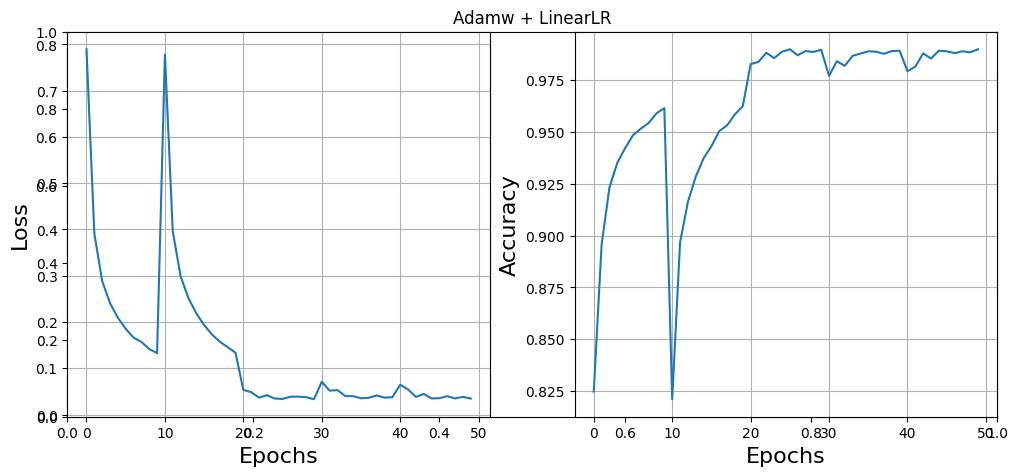

In [147]:
make_plot('Adamw + LinearLR')

Обучим AdamW + CosineAnnealing:

In [148]:
model = nn.Sequential(
    nn.Conv2d(in_channels=1, out_channels=10, kernel_size=5),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=4),
    nn.Flatten(),
    nn.Linear(6*6*10, 128),
    nn.ReLU(),
    nn.Linear(128, 10)
)

optimizer = AdamW(model.parameters(), lr=0.001)
sheduler = CosineAnnealing(optimizer, eta_min=0.001)

train(model, optimizer, n_epochs=10)

  0%|          | 0/313 [00:00<?, ?it/s]/tmp/ipython-input-3084390804.py:23: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  loss = NLLLoss()(log_softmax(y_pred), y_test)
100%|██████████| 313/313 [00:03<00:00, 94.16it/s] 


Epoch: 0, loss: 0.06952571868896484, accuracy: 0.9781


100%|██████████| 313/313 [00:02<00:00, 108.35it/s]


Epoch: 1, loss: 0.0493452288210392, accuracy: 0.9828


100%|██████████| 313/313 [00:02<00:00, 109.23it/s]


Epoch: 2, loss: 0.0430721677839756, accuracy: 0.985


100%|██████████| 313/313 [00:02<00:00, 108.43it/s]


Epoch: 3, loss: 0.04472416639328003, accuracy: 0.9855


100%|██████████| 313/313 [00:02<00:00, 108.04it/s]


Epoch: 4, loss: 0.0395280122756958, accuracy: 0.987


100%|██████████| 313/313 [00:02<00:00, 109.96it/s]


Epoch: 5, loss: 0.03963325545191765, accuracy: 0.9873


100%|██████████| 313/313 [00:02<00:00, 106.45it/s]


Epoch: 6, loss: 0.03606370463967323, accuracy: 0.9885


100%|██████████| 313/313 [00:03<00:00, 95.72it/s]


Epoch: 7, loss: 0.04309996962547302, accuracy: 0.9871


100%|██████████| 313/313 [00:03<00:00, 86.60it/s]


Epoch: 8, loss: 0.03638364374637604, accuracy: 0.9885


100%|██████████| 313/313 [00:03<00:00, 95.08it/s] 

Epoch: 9, loss: 0.03833596780896187, accuracy: 0.9877


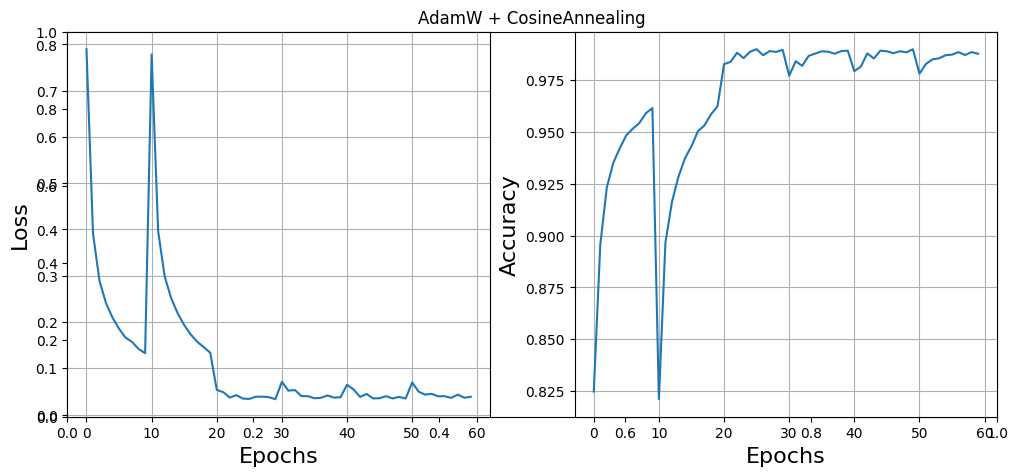

In [150]:
make_plot('AdamW + CosineAnnealing')